# BT4222 Assignment 3
By Teo Zhi Feng (A0203989N)

# 1 Setup

In [ ]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.datasets import imdb

In [ ]:
# fix random seed for reproducibility
np.random.seed(123)

# 2 Data Exploration

### Download data

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

25000 train sequences
25000 test sequences


In [ ]:
print("Number of unique words of x_train:", len(np.unique(np.hstack(x_train))))
print("Number of unique words of x_test:", len(np.unique(np.hstack(x_test))))

Number of unique words of x_train: 4998
Number of unique words of x_test: 4997


In [ ]:
print("Number of categories in y_train:", np.unique(y_train))
print("Number of categories in y_test:", np.unique(y_test))

Number of categories in y_train: [0 1]
Number of categories in y_test: [0 1]


### Analyse sentence length

In [ ]:
length = [len(x) for x in x_train]
print('Average length: ', np.mean(length))
print('Standard deviation of length: ', np.std(length))
print('Minimum length: ', np.min(length))
print('Maximum length: ', np.max(length))

Average length:  238.71364
Standard deviation of length:  176.49367364852034
Minimum length:  11
Maximum length:  2494


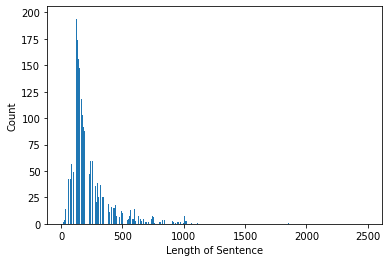

In [ ]:
plt.hist(length, density=False, bins=4500)
plt.ylabel('Count')
plt.xlabel('Length of Sentence');

### Pad sequence to ensure equal length

In [ ]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 500)
x_test shape: (25000, 500)


# 3 Convolutional Neural Network (CNN)

In [ ]:
epochs = 5
batch_size = 64
maxlen = 500 # max number of words in the review
max_features = 5000 # max number of words in the corpus
embedding_dims = 128   # 50 # emddeding for each word
#filters = 250
#kernel_size = 3 #size of the 1D conv. layer
hidden_dims = 250 # number of dimensions

### Build model

In [ ]:
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                     embedding_dims,
                     input_length=maxlen))

# Convolution layer 1
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))

# Max pooling
model.add(GlobalMaxPooling1D())

##### OTHER CONVOLUTION LAYERS #####

# Flatten before connecting back 
model.add(Flatten())

model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# Project onto a single unit, dense output layer and apply sigmoid activation function
# to make 0 or 1 predictions for the two classes (positive or negative).
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
# Use binary_crossentropy loss function as it is a binary classification problem 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Predict test dataset

In [ ]:
history_cnn = model.fit(x_train, y_train,
                      epochs=epochs,
                      batch_size=batch_size,
                      validation_split=0.1,
                      callbacks=[EarlyStopping(monitor='val_loss',patience=3, min_delta=0.0001)])

# history_cnn = model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           validation_data=(x_test, y_test))

### Evaluate predictions

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 50)           250000    
_________________________________________________________________
conv1d (Conv1D)              (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
flatten (Flatten)            (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout (Dropout)            (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250)               0

In [ ]:
accuracy_cnn = model.evaluate(x_test,y_test,verbose=0)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accuracy_cnn[0],accuracy_cnn[1]))

Test set
  Loss: 0.516
  Accuracy: 0.891


In [ ]:
history_cnn.history

{'accuracy': [0.999822199344635, 0.9999555349349976, 1.0, 1.0],
 'loss': [0.003524243598803878,
  0.001184531836770475,
  0.00044091217569075525,
  0.00026874570176005363],
 'val_accuracy': [0.8980000019073486,
  0.8980000019073486,
  0.8971999883651733,
  0.897599995136261],
 'val_loss': [0.443440318107605,
  0.4756409525871277,
  0.49980345368385315,
  0.5171829462051392]}

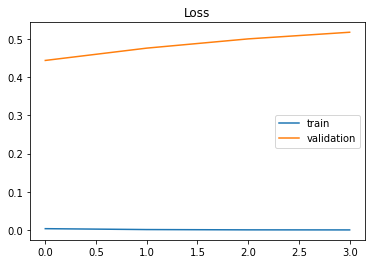

In [ ]:
plt.title('Loss')
plt.plot(history_cnn.history['loss'], label='train')
plt.plot(history_cnn.history['val_loss'], label='validation')
plt.legend()
plt.show()

# 4 Long Short-Term Memory (LSTM) 

In [ ]:
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# 5 Model Comparison